In [2]:
import sys
sys.path.append('./src')

import io_utils
import metrics

df = io_utils.get_df()

df.info()

#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   order_id  2500 non-null   int64  
 1   date      2500 non-null   object 
 2   city      2500 non-null   object 
 3   category  2500 non-null   object 
 4   price     2500 non-null   float64
 5   units     2500 non-null   int64  
 6   revenue   2500 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 136.8+ KB


### 1. Vad säljer vi? – vilka kategorier driver mest intäkt?
Kategorier 'Electronics', 'Sports' respektive ' Clothing' driver mest intäkt.

In [ ]:
from metrics import unique_products, category_revenue

print(f"Vi säljer följande unika kategorier: \n {unique_products}")

print(f"\nIntäkt per kategori: \n {category_revenue}")

In [ ]:
import matplotlib.pyplot as plt


fig, ax =plt.subplots()
category_revenue.plot(kind="bar", ax=ax)
ax.set_title("Intäkt per kategorie")
ax.set_xlabel("Kategorie")
ax.set_ylabel("Intäkt")
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()

### 2. Var säljer vi? – vilka städer står för störst intäkt?
Stockholm, Göteborg respektive Malmö står för störst intakt

In [ ]:
from metrics import units_per_city, top_cities, category_per_city
top_cities # sum of revenue per city

In [ ]:
units_per_city #sum of units per category and city

In [ ]:
category_per_city #sum of revenue per category and city.

In [ ]:
fig, ax = plt.subplots()
category_per_city.plot(kind='bar', ax=ax)
ax.set_title("Intäkter per stad och kategori")
ax.set_xlabel("Stad")
ax.set_ylabel("Intäkt")
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()

### 3. När säljer vi? – finns tidsmönster/säsong i försäljningen?


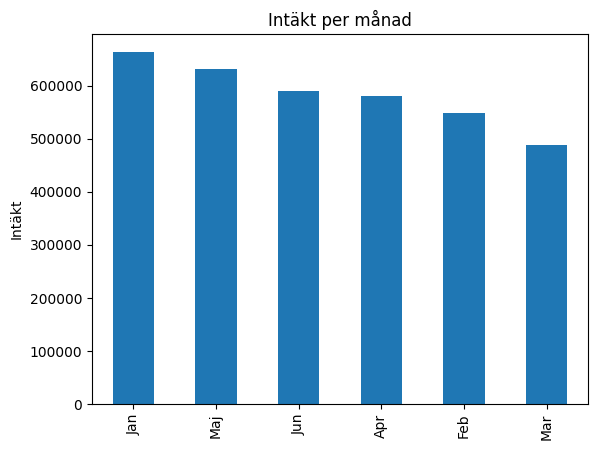

In [3]:
import matplotlib.pyplot as plt
import metrics


rev_month = metrics.get_revenue_by_month()


month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec']

rev_month.index = [month_names[int(m)-1] if str(m).isdigit() else m for m in rev_month.index]
rev_month.plot(kind='bar', title='Intäkt per månad')
plt.ylabel('Intäkt')
plt.show()

In [8]:
from metrics import revenue_by_day, revenue_by_month
print(revenue_by_month)
print()
print(revenue_by_day)

def get_revenue_by_month():
    return revenue_by_month

Jan    664083.32
Maj    632165.16
Jun    590259.89
Apr    580194.83
Feb    548462.03
Mar    487602.00
Name: revenue, dtype: float64

day
9     156486.43
4     142734.92
23    137403.39
7     134633.50
25    130511.88
21    129325.48
10    128955.11
26    128417.60
17    128181.58
16    127302.09
27    126773.85
1     125049.07
3     118576.22
29    116672.81
18    113459.03
13    113412.81
6     112371.59
24    109436.14
28    108897.74
19    108571.86
8     107904.44
22    105843.54
20    104509.51
15     97686.86
2      97440.77
12     94719.45
5      86780.50
14     86106.95
11     84378.76
30     81256.48
31     58966.87
Name: revenue, dtype: float64


### 4. Hur ser en typisk order ut? – AOV (Average Order Value) och spridning.


### 5. Topp-listor – topp-3 kategorier efter intäkt.


In [ ]:
# Summera intäkt per kategori
kategori_sum = df.groupby("category")["revenue"].sum()

# Plocka fram topp 3
top3 = kategori_sum.nlargest(3)

# Totala intäkten (avrundad uppåt till närmaste 500, med min 1000)
total = kategori_sum.sum()
total_rounded = max(1000, int(np.ceil(total / 500.0) * 500))

print("Top 3 kategorier baserat på omsättning:")
print(top3)
print(f"\nTotal omsättning: {total} (avrundad till {total_rounded})")

kategori_sum = df.groupby("category")["revenue"].sum()
top3 = kategori_sum.nlargest(3)
top3.plot(kind="bar", color="skyblue")

plt.title("Top 3 kategorier baserat på omsättning")
plt.ylabel("Total omsättning")

# Visa hela tal istället för 1e6
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

### 6. Eventuella avvikelser – något oväntat mönster som sticker ut?


### Rekommendationer:

Ni ska avsluta rapporten med 2–3 korta rekommendationer (punktlista) baserat på era resultat, t.ex. “Satsa på kategori X i stad Y under månad Z”.